<a href="https://colab.research.google.com/github/yosriawedi/ML-Project-Insurance/blob/model-training/supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
data=pd.read_csv("data_encoded.csv")

              Model          MAE         RMSE        R2
5  GradientBoosting  2998.680684  5586.161756  0.755443
4      RandomForest  3289.954123  5982.102682  0.719547
1             Ridge  4532.148082  6749.668397  0.642959
0  LinearRegression  4531.453110  6749.730067  0.642953
2             Lasso  4531.427108  6749.735377  0.642952
3      DecisionTree  4271.170584  8529.807512  0.429794

Feature Importances (Random Forest):
      Feature  Importance
5  smoker_yes    0.580582
1         bmi    0.203188
0         age    0.160067
2    children    0.024654
3      region    0.021817
4    sex_male    0.009692


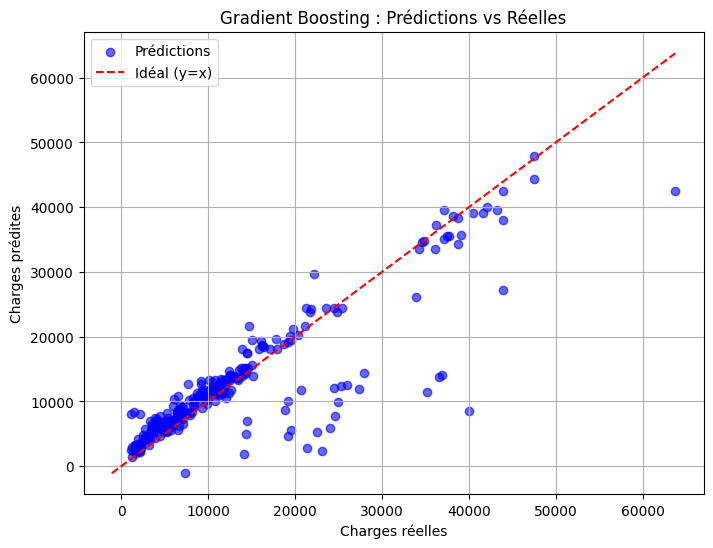

In [ ]:
# -------------------------------
# 1️⃣ Import des librairies
# -------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# -------------------------------
# 2️⃣ Charger le dataset
# -------------------------------
df = pd.read_csv("data_encoded.csv")  # mettre le vrai chemin de ton CSV

# -------------------------------
# 3️⃣ Séparer features et target
# -------------------------------
X = df.drop('charges', axis=1)
y = df['charges']

# -------------------------------
# 4️⃣ Diviser en train/test
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# 5️⃣ Normalisation (pour certains modèles)
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# 6️⃣ Définir les modèles
# -------------------------------
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# -------------------------------
# 7️⃣ Entraîner et évaluer les modèles
# -------------------------------
results = []

for name, model in models.items():
    # Certains modèles fonctionnent mieux avec données standardisées
    if name in ["LinearRegression", "Ridge", "Lasso"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    })

# -------------------------------
# 8️⃣ Afficher les résultats
# -------------------------------
results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
print(results_df)

# -------------------------------
# 9️⃣ Optionnel : Importance des features pour Random Forest
# -------------------------------
rf_model = models["RandomForest"]
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)
print("\nFeature Importances (Random Forest):")
print(feature_importance_df)

# -------------------------------
# 🔟 Visualisation scatter pour Gradient Boosting
# -------------------------------
gb_model = models["GradientBoosting"]
y_pred_gb = gb_model.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_gb, alpha=0.6, color="blue", label="Prédictions")
lims = [min(y_test.min(), y_pred_gb.min()), max(y_test.max(), y_pred_gb.max())]
plt.plot(lims, lims, 'r--', label="Idéal (y=x)")  # ligne de référence
plt.xlabel("Charges réelles")
plt.ylabel("Charges prédites")
plt.title("Gradient Boosting : Prédictions vs Réelles")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df["bmi_smoker"] = df["bmi"] * df["smoker_yes"]


Polynomial Regression (degree=2)
MAE: 3128.20
RMSE: 5387.24
R²: 0.773


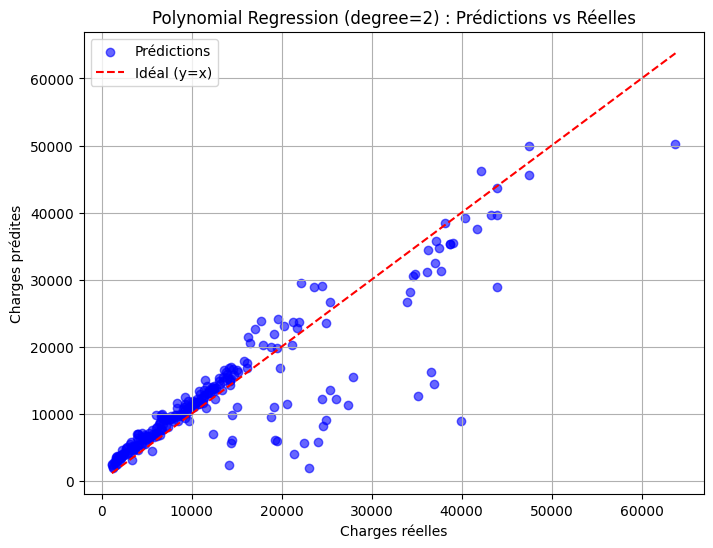

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# 1️⃣ Création et entraînement du modèle Polynomial Regression
# -------------------------------
poly_model = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])

poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

# -------------------------------
# 2️⃣ Évaluation
# -------------------------------
mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression (degree=2)")
print(f"MAE: {mae_poly:.2f}")
print(f"RMSE: {rmse_poly:.2f}")
print(f"R²: {r2_poly:.3f}")

# -------------------------------
# 3️⃣ Visualisation graphique
# -------------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_poly, alpha=0.6, color="blue", label="Prédictions")
lims = [min(y_test.min(), y_pred_poly.min()), max(y_test.max(), y_pred_poly.max())]
plt.plot(lims, lims, 'r--', label="Idéal (y=x)")  # ligne de référence
plt.xlabel("Charges réelles")
plt.ylabel("Charges prédites")
plt.title("Polynomial Regression (degree=2) : Prédictions vs Réelles")
plt.legend()
plt.grid(True)
plt.show()
